## 1. Load Titanic Dataset

The Titanic dataset was downloaded from Kaggle and loaded into a Jupyter
Notebook using the Pandas library. The dataset contains information about
passengers such as age, gender, passenger class, and survival status.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
!dir

 Volume in drive C is Acer
 Volume Serial Number is 3894-435E

 Directory of C:\Users\Girish S\Intership\Task_2

27-01-2026  21:55    <DIR>          .
27-01-2026  21:45    <DIR>          ..
27-01-2026  21:47    <DIR>          .ipynb_checkpoints
27-01-2026  21:47            22,564 archive (1).zip
27-01-2026  21:55             1,922 Untitled.ipynb
               2 File(s)         24,486 bytes
               3 Dir(s)  204,258,365,440 bytes free


In [13]:
import zipfile

with zipfile.ZipFile("archive (1).zip","r") as zip_ref:
    zip_ref.extractall()

In [14]:
!dir

 Volume in drive C is Acer
 Volume Serial Number is 3894-435E

 Directory of C:\Users\Girish S\Intership\Task_2

27-01-2026  22:00    <DIR>          .
27-01-2026  21:45    <DIR>          ..
27-01-2026  21:47    <DIR>          .ipynb_checkpoints
27-01-2026  21:47            22,564 archive (1).zip
27-01-2026  22:00            61,194 Titanic-Dataset.csv
27-01-2026  21:59             3,317 Untitled.ipynb
               3 File(s)         87,075 bytes
               3 Dir(s)  204,256,878,592 bytes free


In [16]:
import pandas as pd

In [18]:
df=pd.read_csv("titanic-Dataset.csv")

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Data Cleaning

Real-world datasets often contain missing values. In the Titanic dataset,
the Age and Embarked columns had missing values, while the Cabin column had
a large number of missing entries.


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2.1 Handling Missing Age Values

The Age column contained missing values. These values were filled using
the mean age of all passengers to ensure data consistency.


In [24]:
df["Age"].fillna(df["Age"].mean(), inplace=True)


C:\Users\Girish S\AppData\Local\Temp\ipykernel_34404\149581262.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)


In [25]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2.2 Dropping Cabin Column

The Cabin column had a very high number of missing values and was therefore
removed from the dataset.


In [28]:
df.drop("Cabin",axis=1,inplace=True)

### 2.3 Handling Missing Embarked Values

The Embarked column had only a few missing values. These were filled using
the most frequently occurring embarkation port.


In [29]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


C:\Users\Girish S\AppData\Local\Temp\ipykernel_34404\585847971.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [30]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 3. Data Analysis

After cleaning the dataset, exploratory data analysis was performed to
answer key questions related to passenger survival.


### 3.1 Survival by Gender

This analysis compares survival rates between male and female passengers.


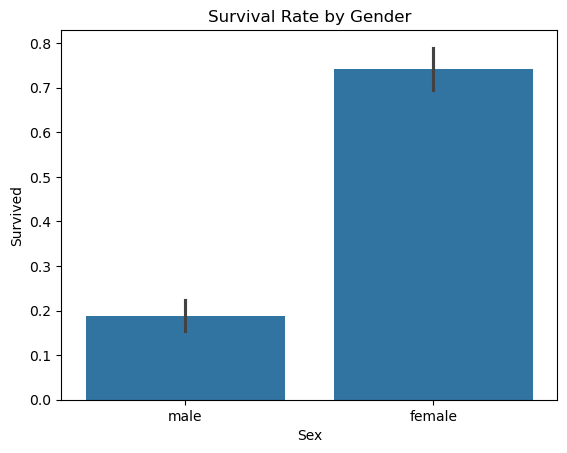

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()


**Insight:**  
Female passengers had a significantly higher survival rate compared to male
passengers.


### 3.2 Survival by Passenger Class

This analysis examines whether passenger class influenced survival chances.


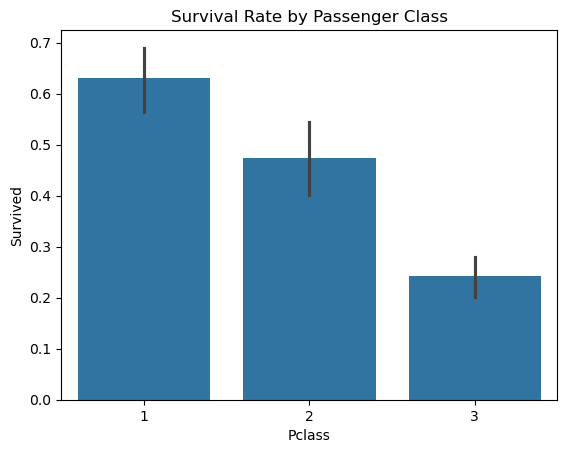

In [33]:
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()


**Insight:**  
Passengers traveling in first class had the highest survival rate, while
third-class passengers had the lowest.


### 3.3 Survival by Age Group

This analysis explores the distribution of passenger ages to understand
survival trends across different age groups.


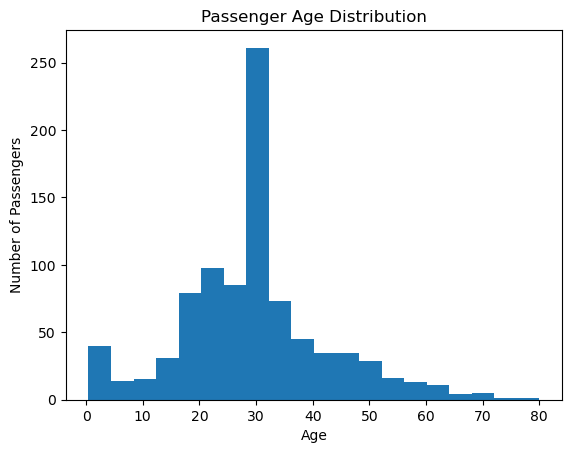

In [35]:
df["Age"].plot(kind="hist", bins=20)
plt.title("Passenger Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()


**Insight:**  
The majority of passengers were adults. Children showed relatively better
survival chances compared to older age groups.


## 4. Data Visualization

Seaborn and Matplotlib were used to visualize survival patterns in the
Titanic dataset.


- Bar chart of survival by gender  
- Bar chart of survival by passenger class  
- Histogram of passenger ages


## Conclusion

The analysis shows that gender, passenger class, and age played an important
role in survival during the Titanic disaster. Females and first-class
passengers had a higher probability of survival.
